<a href="https://www.kaggle.com/code/mvsaikumar/predict-ctr-of-an-email-campaign?scriptVersionId=108719920" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predict CTR of an Email Campaign

Can you predict the Click Through Rate (CTR) of an email campaign?

## Problem Statement

Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.

Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).

CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.

CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered

CTR depends on multiple factors like design, content, personalization, etc. 

How do you design the email content effectively?

What should your subject line look like?

What should be the length of the email?

Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

## Objective

Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.

## About the Dataset

You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.

## Data Dictionary

You are provided with 3 files - train.csv, test.csv and sample_submission.csv


## Train and Test Set

Train and Test set contains different sets of email campaigns containing information about the email campaign. Train set includes the target variable click_rate and you need to predict the click_rate of an email campaign in the test set.


**Variable**  -   **Description**

**campaign_id** - Unique identifier of a campaign

**sender** - Sender of an e-mail

**subject_len** - No. of characters in a subject

**body_len** - No. of characters in an email body

**mean_paragraph_len** - Average no. of characters in paragraph of an email

**day_of_week** - Day on which email is sent

**is_weekend** - Boolean flag indicating if an email is sent on weekend or not

**times_of_day** - Times of day when email is sent: Morning, Noon, Evening

**category** - Category of the product an email is related to

**product** - Type of the product an email is related to

**no_of_CTA** - No. of Call To Actions in an email

**mean_CTA_len** - Average no. of characters in a CTA 

**is_image** - No. of images in an email

**is_personalised** - Boolean flag indicating if an email is personalized to the user or not

**is_quote** - No. of quotes in an email

**is_timer** - Boolean flag indicating if an email contains a timer or not

**is_emoticons** - No. of emoticons in an email

**is_discount** - Boolean flag indicating if an email contains a discount or not

**is_price** - Boolean flag indicating if an email contains price or not

**is_urgency** - Boolean flag indicating if an email contains urgency or not

**target_audience** - Cluster label of the target audience

**click_rate (Target Variable)** - Click rate of an email campaign


## Submission File Format

sample_submission.csv contains 2 variables - campaign id and click_rate


**Variable**  - **Description**

**campaign_id** - Unique Identifier of a campaign id

**click_rate (Target Variable)** - Click rate of an email campaign


## Evaluation metric

The evaluation metric for this hackathon would be r2_score.


## Public and Private Split

Test data is further divided into Public (40%) and Private (60%) data. Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.


###  1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Data Inspection

In [2]:
# Read the datasets

train = pd.read_csv('../input/jobathon-august-2022/train_F3fUq2S.csv')
test = pd.read_csv('../input/jobathon-august-2022/test_Bk2wfZ3.csv')

In [3]:
# check the shapes of the dataset

print('No.of rows and columns in train dataset',train.shape, '\n')
print('No.of rows and columns in test dataset',test.shape)

No.of rows and columns in train dataset (1888, 22) 

No.of rows and columns in test dataset (762, 21)


__We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.__ 

In [4]:
# Read the first 5 rows of train and test datasets

train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [5]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [6]:
# Info about the train and test datsets

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

__In the train dataset, we have 1 categorical feature and 20 numerical features__

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

__In the test dataset, we have 1 categorical feature and 19 numerical features__

### 3. Data Cleaning

* __Check for Missing values__

Before we go on to build the model, we must look for missing values within the dataset as treating the missing values is a necessary step before we fit a machine learning model on the dataset.

In [8]:
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [9]:
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

__In the train and test datasets, we don't have any null values.__

### 4. Exploratary Data Analysis (EDA)

In [10]:
# Features in train and test datasets

train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [11]:
test.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

* __Target Variable__

In this section we will take a look at the 'click_rate' (CTR) of an email campaign which is the target variable. It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [12]:
train['click_rate'].describe()

count    1888.000000
mean        0.041888
std         0.084223
min         0.000000
25%         0.005413
50%         0.010686
75%         0.035589
max         0.897959
Name: click_rate, dtype: float64

__The target variable (Click Through Rate) has a max of 89% Click rate.__

* __Univariate Analysis__

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

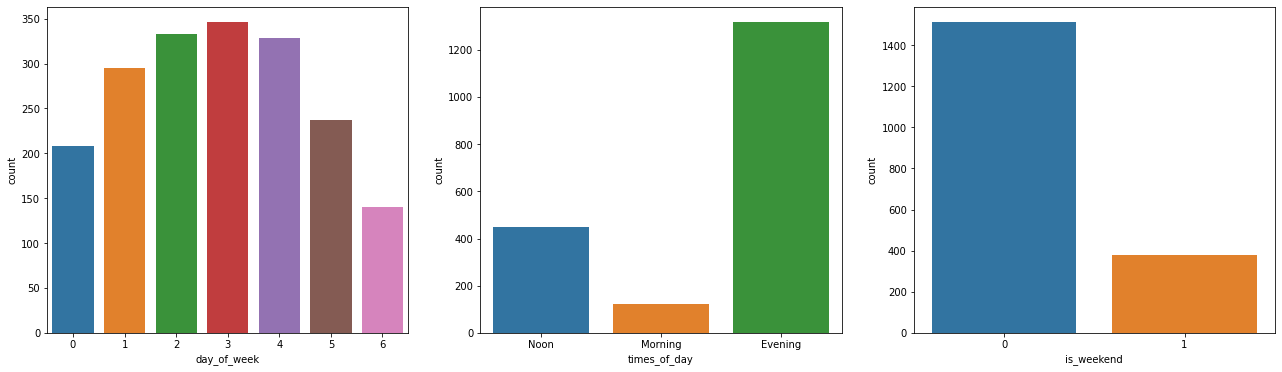

In [13]:
# Binary Features

plt.figure(figsize=(22,6))

# Day of week
plt.subplot(1,3,1)
sns.countplot('day_of_week',data=train)

# Times of day
plt.subplot(1,3,2)
sns.countplot('times_of_day',data=train)

# Weekend or not
plt.subplot(1,3,3)
sns.countplot('is_weekend',data=train)

__Assume that 0-6 indicates Sunday to Saturday, as most of the emails were sent on wednesday, tuesday and thrusaday.__

__Most of the emails were sent during evenings as people were free during most of that time.__

__Assume that 0 --> Not Weekend, 1 --> Weekend, as most of the emails were sent on weekdays and less no.of emails were sent on weekends.__

<AxesSubplot:xlabel='is_emoticons', ylabel='count'>

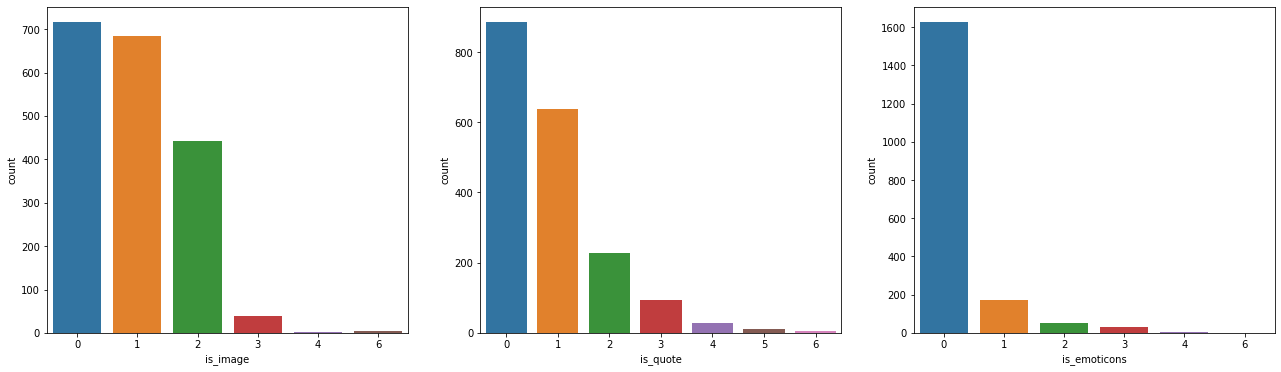

In [14]:
plt.figure(figsize=(22,6))

# No.of Images in an email
plt.subplot(1,3,1)
sns.countplot('is_image',data=train)

# No.of quotes in an email
plt.subplot(1,3,2)
sns.countplot('is_quote',data=train)

# No. of emoticons in an email
plt.subplot(1,3,3)
sns.countplot('is_emoticons',data=train)

__Assume that 0 to 6 indicates no.of images in an email. Since email containing 0-2 images are more and with 3-6 images are less__

__Email containing 0-1 quotes are more and with 2-6 are less__

__Email containing 0 emotions/emojis are more and with 1-6 are less__

<AxesSubplot:xlabel='is_urgency', ylabel='count'>

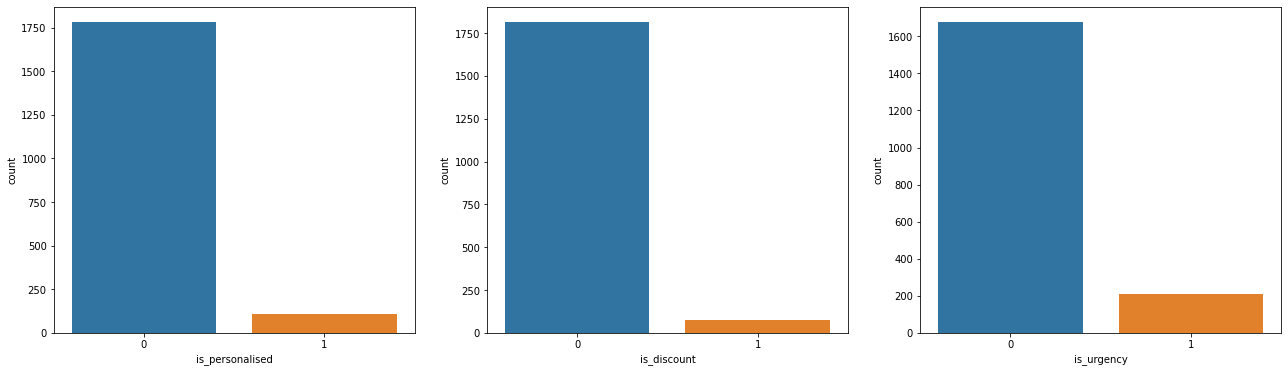

In [15]:
plt.figure(figsize=(22,6))

# Personalized emails or not
plt.subplot(1,3,1)
sns.countplot('is_personalised',data=train)

# Discount email or not
plt.subplot(1,3,2)
sns.countplot('is_discount',data=train)

# Urgent email or not
plt.subplot(1,3,3)
sns.countplot('is_urgency',data=train)

__Most the emails were not personalized which can be special discounts, offers emails and less no.of emails were personalized which can be related towards their work.__

__Most of them were not discount emails and less no.of emails were discounted emails since most of the discount emails get during sales period.__

__Most of the emails were not important/urgency emails and less no.of emails were urgency emails since it can be related towards their work.__

* __Bivariate Analysis__

<AxesSubplot:xlabel='is_image', ylabel='click_rate'>

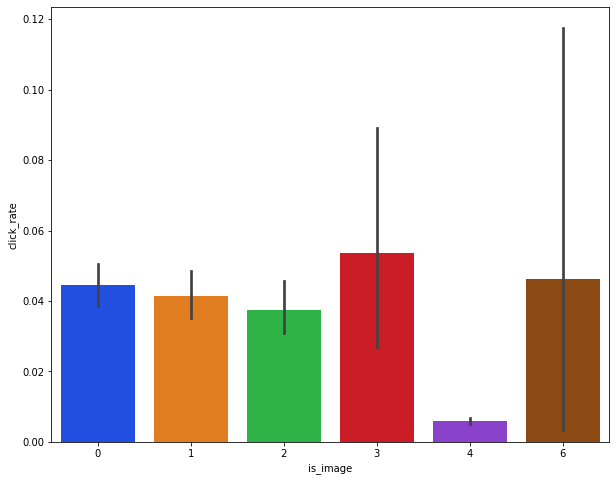

In [16]:
# Click rate vs Image 

plt.figure(figsize=(10,8))
sns.barplot(x='is_image',y='click_rate',data=train,palette='bright')

__0-2 images in an email are more but click rate for 6 and 3 images in an email seems higher and hence CTR can be maxmized by providing more images in an email.__

<Figure size 1440x576 with 0 Axes>

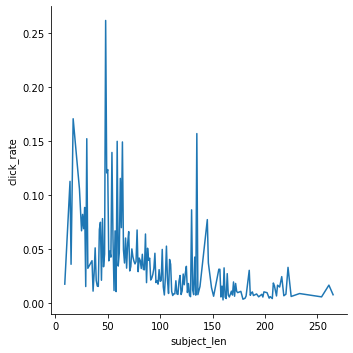

In [17]:
# click rate vs subject length

plt.figure(figsize=(20,8))
sns.relplot(x="subject_len", y="click_rate",ci=None,kind="line", data=train)

__If the no.of characters in a subject of an email is 50 then CTR can be maximized.__

<Figure size 1440x576 with 0 Axes>

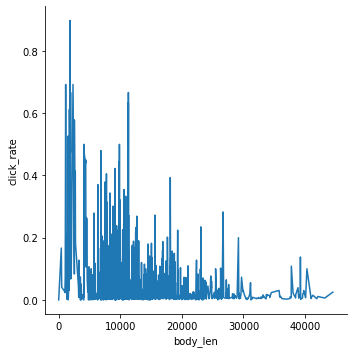

In [18]:
# click rate vs length of an email

plt.figure(figsize=(20,8))
sns.relplot(x="body_len", y="click_rate",ci=None,kind="line", data=train)

 __If the No. of characters in an email body is in the range of 100-200 then CTR can be maxmized.__

<Figure size 1440x576 with 0 Axes>

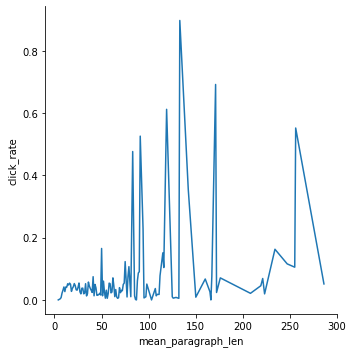

In [19]:
# click rate vs Mean paragraph length of an email

plt.figure(figsize=(20,8))
sns.relplot(x="mean_paragraph_len", y="click_rate",ci=None,kind="line", data=train)

__To maxmize the CTR the Average no. of characters in paragraph of an email should be in the range of 130-150.__

* __Correlation Heat Map__

Understanding the correlation between various features in the dataset

In [20]:
correlation = train.corr()

<AxesSubplot:>

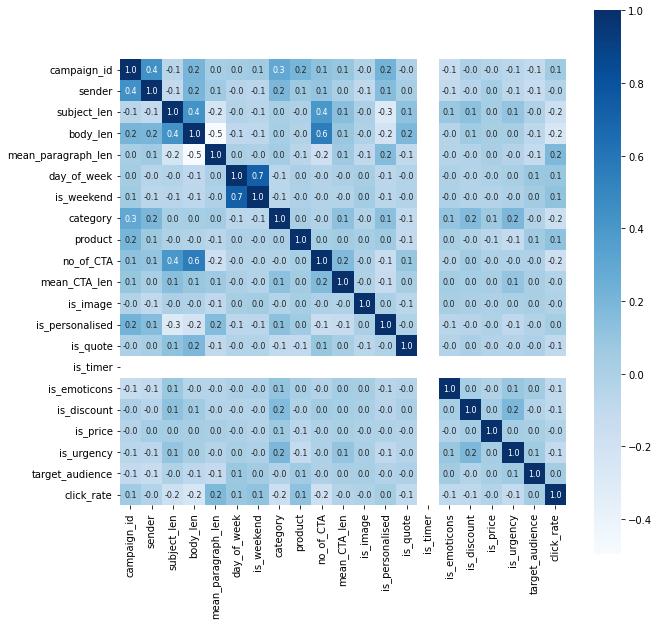

In [21]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### 5. Data Pre-Processing

* __Label Encoding to the Categorical features__

Here only 'times of day' is the only categorical feature

In [22]:
print(train['times_of_day'].value_counts(),'\n')
print(test['times_of_day'].value_counts(),'\n')

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64 

Evening    532
Noon       175
Morning     55
Name: times_of_day, dtype: int64 



In [23]:
# Import Label encoder from sklearn

from sklearn.preprocessing import LabelEncoder

In [24]:
# Define the model
le = LabelEncoder()

var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [25]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [26]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,2,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,0,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,0,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,2,6,26,...,40,0,0,0,0,0,0,0,0,14


__The labels in the 'times of day' feature has changed to numerical data in the train and test data.__

__Here 1--> Morning, 2--> Noon, 0--> Evening 

### 6. Model Building

In [27]:
# Import train test split from sklearn

from sklearn.model_selection import train_test_split

In [28]:
# Splitting the data into Features and Traget

X = train.drop(['click_rate'],axis=1)
Y = train['click_rate']

In [29]:
print(X, '\n')
print(Y)

      campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0               1       3           76     10439                  39   
1               2       3           54      2570                 256   
2               3       3           59     12801                  16   
3               4       3           74     11037                  30   
4               5       3           80     10011                  27   
...           ...     ...          ...       ...                 ...   
1883         1884       3           88      1451                  75   
1884         1885       3           58     10537                  40   
1885         1886       3           89     11050                  26   
1886         1887       3           58     10537                  40   
1887         1888       3           89     11050                  26   

      day_of_week  is_weekend  times_of_day  category  product  ...  \
0               5           1             2         6       26  

In [30]:
# Splitting the data into Training data and Test data(20%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 22)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(1888, 21) (1510, 21) (378, 21)


### 7. Development with ML Models

In [32]:
# Import the ML models libraries

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [33]:
algos = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), XGBRegressor()]

names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'K Neighbors Regressor', 'Decision Tree Regressor', 'XGBoost Regressor']

r2_score_list = []

In [34]:
for name in algos:
    model = name                           # Load the model
    model.fit(X_train, Y_train)            # Fit the model with training data
    test_data_pred = model.predict(X_test)        # prediction on test data(i.e Y_pred)
    r2 = metrics.r2_score(Y_test, test_data_pred)   # R2 error
    r2_score_list.append(r2)

In [35]:
evaluation = pd.DataFrame({'Model': names, 'r2': r2_score_list})

In [36]:
evaluation

,Model,r2
0,Linear Regression,0.121362
1,Lasso Regression,0.063618
2,Ridge Regression,0.121473
3,K Neighbors Regressor,0.272447
4,Decision Tree Regressor,0.096715
5,XGBoost Regressor,0.557550


### 8. Conclusion and Submission

As we can clearly see XGBoost Regressor performs slighlty better than KNeighbours Regressor, Linear, Ridge and Lasso regression and Decision Tree Regressor do not improve the score so we can select XGBoost Regressor for making our final predictions.

__Make a Submission to CSV file__

In [37]:
submission = pd.read_csv('../input/jobathon-august-2022/sample_submission_LJ2N3ZQ.csv')
model = XGBRegressor()
model.fit(X, Y)
final_predictions = model.predict(test)
submission['click_rate'] = final_predictions

In [38]:
print(final_predictions)

[ 1.29891619e-01  1.57037526e-01  2.78526187e-01  2.78526187e-01
  1.06823526e-01  8.34494606e-02  7.21955625e-03  3.16429022e-03
  4.23383638e-02  3.04214731e-02  2.40662601e-02  8.71517658e-02
  2.16489262e-03  1.91694945e-02  4.83820774e-02  3.83185223e-02
  2.47685723e-02  1.63237359e-02  2.51350459e-02  4.19223271e-02
  1.31289652e-02  1.81701202e-02  1.88425332e-02  2.87642926e-02
  5.21754585e-02  4.05700468e-02  1.17324367e-01  9.06611420e-03
  1.21842369e-01  4.45922390e-02  5.31758033e-02  1.53314874e-01
 -2.91830394e-03  1.72261506e-01  5.48477322e-02  4.74582799e-02
  8.00144486e-03  3.06841265e-03  3.90467630e-03  6.99584857e-02
  2.98358011e-03  7.53475577e-02 -1.75360870e-03  8.87777284e-02
  9.19376388e-02  6.06419984e-03  1.54249053e-02  3.24616842e-02
  5.73674850e-02  6.59291213e-03  7.78059363e-02  1.84330102e-02
  1.97515134e-02  4.78561148e-02  9.46500991e-03  4.17413898e-02
  1.12136908e-01 -2.83422647e-03  1.33699924e-02  1.81023311e-02
  1.05095536e-01  2.84031

In [39]:
#only positive predictions for the target variable

#submission['click_rate'] = submission['click_rate'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)